In [ ]:
import serial
import time
import csv

ser = serial.Serial('/dev/ttyACM1')
ser.flushInput()

while True:
    ser_bytes = ser.readline()
    print(ser_bytes)
    decoded_bytes = ser_bytes[0:len(ser_bytes)-1].decode("utf-8")
    out = decoded_bytes.split(",")
    iteration = out[0]
    temp = out[1]
    print(decoded_bytes)
    with open("temperature.csv","a") as f:
        writer = csv.writer(f,delimiter=",")
        writer.writerow([iteration,temp])
    

In [6]:
import serial
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

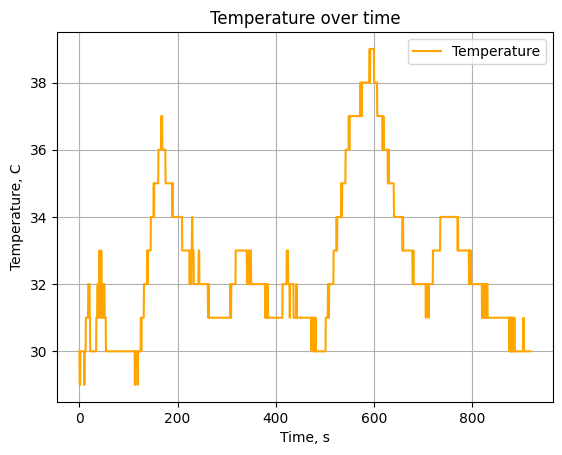

In [7]:
#A2.1
df = pd.read_csv("temperature.csv")
plt.plot((df["timestep"]-4)*0.5, df["temp"], color="orange") #The csv started from step 4 so -4 is for calibration, the recording was at 2 Hz so 0.5 converts it to seconds
plt.grid()
plt.xlabel("Time, s")
plt.ylabel("Temperature, C")
plt.title("Temperature over time")
plt.legend(["Temperature"])
plt.show()


In [ ]:
#A2.2
ser = serial.Serial('/dev/ttyACM1')
ser.flushInput()

i = 0
while i < 1200:
    ser_bytes = ser.readline()
    print(ser_bytes)
    decoded_bytes = ser_bytes[0:len(ser_bytes)-2].decode("utf-8")
    out = decoded_bytes.split(",")
    print(decoded_bytes)
    with open("IMU2.csv","a") as f:
        writer = csv.writer(f,delimiter=",")
        writer.writerow(out)
    i+=1

In [9]:
temp_df = pd.read_csv("IMU2.csv")
print(temp_df)

            date         time    Ax    Ay    Az      Gx       Gy     Gz
0     2025-02-07  14:15:13.00 -0.88 -0.48  0.09  -26.43   -11.29  -4.52
1     2025-02-07  14:15:13.50 -0.80 -0.60 -0.19  -44.37     0.06 -23.80
2     2025-02-07  14:15:14.00 -0.76 -0.63 -0.04   60.79     5.07   6.16
3     2025-02-07  14:15:14.50 -0.76 -0.71  0.08   15.38    -7.69  -7.87
4     2025-02-07  14:15:15.00 -0.70 -0.73  0.07    6.35    -9.46   3.36
...          ...          ...   ...   ...   ...     ...      ...    ...
1195  2025-02-07  14:25:10.50  0.20  0.85 -0.45   11.23    -0.24  -2.50
1196  2025-02-07  14:25:11.00  0.26  0.56 -0.55  228.03    46.81  24.72
1197  2025-02-07  14:25:11.50  0.22 -0.72 -0.71    2.26    55.30  -0.67
1198  2025-02-07  14:25:12.00  1.65 -0.91 -1.53  117.07    44.01  14.16
1199  2025-02-07  14:25:12.50  4.00  0.53 -0.31  285.58  1248.78  90.88

[1200 rows x 8 columns]


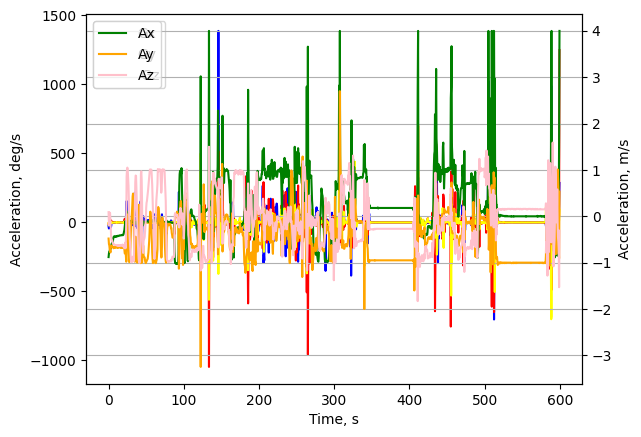

In [33]:
iters = np.array(range(1200)) * 0.5
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(iters, temp_df["Gx"], color="blue")
ax1.plot(iters, temp_df["Gy"],color="red")
ax1.plot(iters, temp_df["Gz"],color = "yellow")
ax2.plot(iters, temp_df["Ax"],color = "green")
ax2.plot(iters, temp_df["Ay"],color = "orange")
ax2.plot(iters, temp_df["Az"], color = "pink")
plt.grid()
ax2.set_ylabel("Acceleration, m/s")
ax1.set_ylabel("Acceleration, deg/s")
ax1.set_xlabel("Time, s")
ax1.legend(["Gx", "Gy"," Gz"])
ax2.legend(["Ax","Ay","Az"])
plt.show()


In [40]:
filter_by_acceleration = temp_df.loc[np.sqrt(temp_df["Ax"]**2 + temp_df["Ay"]**2 + temp_df["Az"]**2) > 1.5]
print(len(filter_by_acceleration))

56


In [11]:
#A2.2
IOT_temp = pd.read_csv("IOT-temp.csv")
filtered_by_date = IOT_temp.loc[pd.to_datetime('02-12-2018 00:00', dayfirst=True) <= pd.to_datetime(IOT_temp["noted_date"], dayfirst=True)]
print(filtered_by_date)

                                       id  room_id/id        noted_date  temp  \
0     __export__.temp_log_196134_bd201015  Room Admin  08-12-2018 09:30    29   
1     __export__.temp_log_196131_7bca51bc  Room Admin  08-12-2018 09:30    29   
2     __export__.temp_log_196127_522915e3  Room Admin  08-12-2018 09:29    41   
3     __export__.temp_log_196128_be0919cf  Room Admin  08-12-2018 09:29    41   
4     __export__.temp_log_196126_d30b72fb  Room Admin  08-12-2018 09:29    31   
...                                   ...         ...               ...   ...   
6885  __export__.temp_log_173404_85aef0fb  Room Admin  02-12-2018 00:10    35   
6886  __export__.temp_log_173401_1097a0f5  Room Admin  02-12-2018 00:08    35   
6887  __export__.temp_log_173400_7b1e838d  Room Admin  02-12-2018 00:08    35   
6888  __export__.temp_log_173394_0312b549  Room Admin  02-12-2018 00:04    35   
6889  __export__.temp_log_173395_78f986f0  Room Admin  02-12-2018 00:04    35   

     out/in  
0        In  

Text(0.5, 0, 'Date')

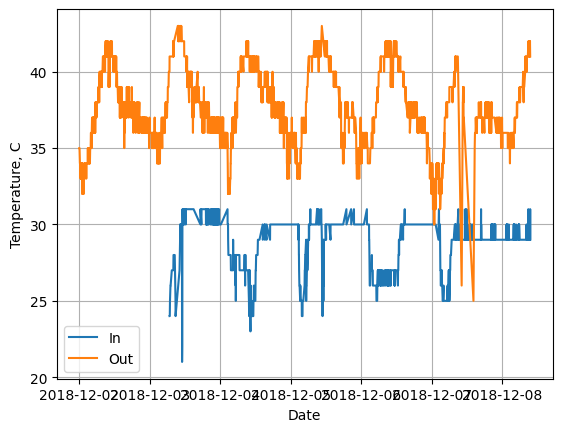

In [12]:
filtered_in = filtered_by_date.loc[filtered_by_date["out/in"] == "In"]
filtered_out = filtered_by_date.loc[filtered_by_date["out/in"] == "Out"]
plt.plot(pd.to_datetime(filtered_in["noted_date"], dayfirst=True), filtered_in["temp"])
plt.plot(pd.to_datetime(filtered_out["noted_date"], dayfirst=True), filtered_out["temp"]) 
plt.grid()
plt.legend(["In", "Out"])
plt.ylabel("Temperature, C")
plt.xlabel("Date")

In [13]:
edit_df = IOT_temp.copy()
edit_df["out/in"]=edit_df["out/in"].map({"In":1, "Out":0})
edit_df["date"], edit_df["time"] = pd.to_datetime(edit_df["noted_date"], dayfirst=True).dt.date, pd.to_datetime(edit_df["noted_date"], dayfirst=True).dt.time
edit_df = edit_df.drop(['noted_date'], axis=1)
edit_df = edit_df.loc[edit_df['date'] == edit_df['date'].max()]
edit_df.to_csv("new_IOT_temp.csv")
print(edit_df)


                                      id  room_id/id  temp  out/in  \
0    __export__.temp_log_196134_bd201015  Room Admin    29       1   
1    __export__.temp_log_196131_7bca51bc  Room Admin    29       1   
2    __export__.temp_log_196127_522915e3  Room Admin    41       0   
3    __export__.temp_log_196128_be0919cf  Room Admin    41       0   
4    __export__.temp_log_196126_d30b72fb  Room Admin    31       1   
..                                   ...         ...   ...     ...   
601  __export__.temp_log_194442_8a532819  Room Admin    29       1   
602  __export__.temp_log_194439_8c07abc5  Room Admin    36       0   
603  __export__.temp_log_194438_3942217a  Room Admin    36       0   
604  __export__.temp_log_194436_61ca11ba  Room Admin    35       0   
605  __export__.temp_log_194437_d9501a33  Room Admin    35       0   

           date      time  
0    2018-12-08  09:30:00  
1    2018-12-08  09:30:00  
2    2018-12-08  09:29:00  
3    2018-12-08  09:29:00  
4    2018-12-08  09

<Axes: >

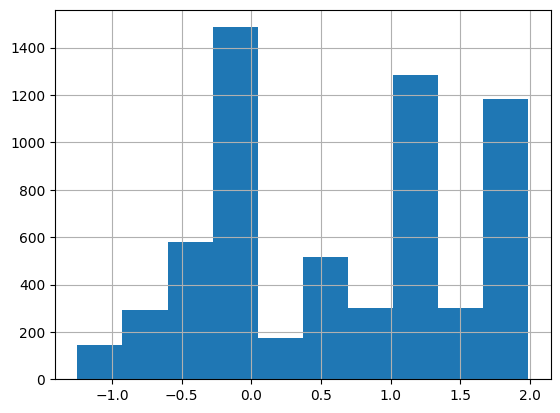

In [14]:
#A2.3 Apple watch
aw_df = pd.read_csv("aw_fb_data.csv")
#aw_df["calories"].hist()
aw_df["log"] = aw_df["calories"].transform(np.log10)
aw_df["log"].hist()

In [15]:
aw_df_copy = aw_df.copy()
unique_participants = aw_df_copy.drop_duplicates(["age", "gender", "height", "weight"])
print(unique_participants)


      Unnamed: 0    X1  age  gender  height  weight      steps   hear_rate  \
0              1     1   20       1   168.0    65.4  10.771429   78.531302   
76            77    77   30       0   164.0    68.0  10.771429   78.531302   
147          148   148   24       0   165.0    43.0  10.771429   79.916667   
220          221   221   32       1   180.0    72.7  10.771429   78.531302   
292          293   293   19       0   172.0    72.5  10.771429   78.531302   
361          362   362   23       1   181.0    95.2  10.771429   78.531302   
439          440   440   20       1   180.0    79.3  10.771429   78.531302   
515          516   516   32       1   177.0    76.7  10.771429   78.531302   
587          588   588   23       1   178.0    77.3  10.771429   78.531302   
661          662   662   26       1   182.0    74.0  10.771429  125.500000   
746          747   747   22       1   185.0    79.4  10.771429   78.531302   
824          825   825   53       0   143.0    49.2  10.771429  

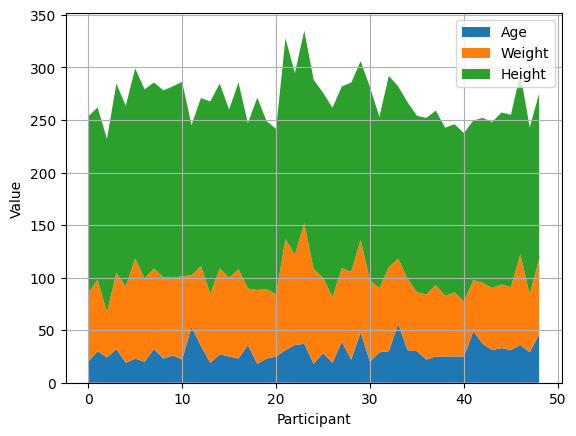

In [16]:
plt.grid()
plt.stackplot(range(49), unique_participants["age"], unique_participants["weight"], unique_participants["height"])
plt.legend(["Age","Weight", "Height"], loc='upper right')
plt.xlabel("Participant")
plt.ylabel("Value")
plt.show()

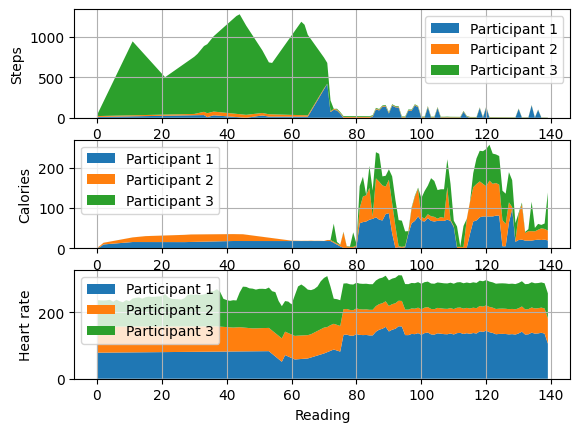

In [17]:
participant_1 = aw_df.loc[(aw_df["age"] == 20) & (aw_df["height"] == 168.0) & (aw_df["weight"] == 65.4)]
participant_2 = aw_df.loc[(aw_df["age"] == 30) & (aw_df["height"] == 164.0) & (aw_df["weight"] == 68.0)]
participant_3 = aw_df.loc[(aw_df["age"] == 24) & (aw_df["height"] == 165.0) & (aw_df["weight"] == 43.0)]
fig, axs = plt.subplots(3)
axs[0].stackplot(range(140), participant_1["steps"][0:140], participant_2["steps"][0:140],participant_3["steps"][0:140])
axs[0].set_xlabel("Reading")
axs[0].set_ylabel("Steps")
axs[1].stackplot(range(140), participant_1["calories"][0:140], participant_2["calories"][0:140],participant_3["calories"][0:140])
axs[1].set_xlabel("Reading")
axs[1].set_ylabel("Calories")
axs[2].stackplot(range(140), participant_1["hear_rate"][0:140], participant_2["hear_rate"][0:140],participant_3["hear_rate"][0:140])
axs[2].set_xlabel("Reading")
axs[2].set_ylabel("Heart rate")
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].legend(["Participant 1", "Participant 2", "Participant 3"])
axs[1].legend(["Participant 1", "Participant 2", "Participant 3"])
axs[2].legend(["Participant 1", "Participant 2", "Participant 3"])

In [18]:
feature_list = ["age", "weight", "height"]
aw_df_c = aw_df.copy()
#normalize
for feature in feature_list:
    aw_df_c[feature]=(aw_df_c[feature]-aw_df_c[feature].min())/(aw_df_c[feature].max()-aw_df_c[feature].min())
feature_list = ["steps", "hear_rate"]
#standartize and add at the end of the table
for feature in feature_list:
    aw_df_c[feature + "_std"]=(aw_df_c[feature]-aw_df_c[feature].mean())/aw_df_c[feature].std()


In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(aw_df_c, test_size = 0.3)
test, val = train_test_split(test, test_size=0.5)
print(val)

      Unnamed: 0    X1       age  gender    height    weight       steps  \
3018        3019  3033  0.184211       0  0.354167  0.131944   17.589744   
1185        1186  1186  0.184211       1  0.354167  0.444444   22.000000   
3444        3445  3459  0.473684       0  0.604167  0.602778  114.000000   
3370        3371  3385  0.342105       0  0.437500  0.236111   99.000000   
387          388   388  0.131579       1  0.791667  0.725000   22.750000   
...          ...   ...       ...     ...       ...       ...         ...   
781          782   782  0.105263       1  0.875000  0.505556   11.947368   
5929        5930  3260  0.342105       0  0.312500  0.223611  134.000000   
5898        5899  3212  0.500000       0  0.291667  0.208333    1.406968   
330          331   331  0.026316       0  0.604167  0.409722    6.238571   
4090        4091   447  0.052632       1  0.770833  0.504167    9.873684   

       hear_rate   calories    distance  ...  corr_heart_steps  norm_heart  \
3018  111

In [20]:
#A2.4 Wind
wind_df = pd.read_csv("Climate2016.csv")
wind = wind_df.copy()

In [26]:
wind["windveloX"] = wind["windvelo (m/s)"]*np.cos(wind["winddeg (deg)"]*np.pi/180)
wind["windveloY"] = wind["windvelo (m/s)"]*np.sin(wind["winddeg (deg)"]*np.pi/180)
wind.to_csv("Climate2016_with_split.csv")
def normalize(array):
    return (array-array.min())/(array.max()-array.min())

In [27]:
normX = normalize(wind["windveloX"])
normY = normalize(wind["windveloY"])
normDeg = normalize(wind["winddeg (deg)"])
normVel = normalize(wind["windvelo (m/s)"])

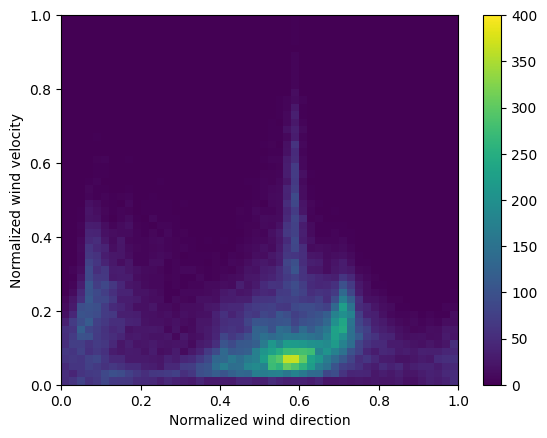

In [31]:
fig, ax = plt.subplots()
h = ax.hist2d(normDeg, normVel, bins=50, vmax = 400)
ax.set_xlabel("Normalized wind direction")
ax.set_ylabel("Normalized wind velocity")
fig.colorbar(h[3], ax=ax)
plt.show()

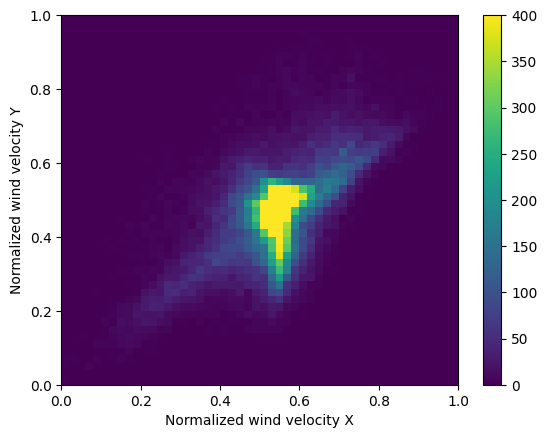

In [32]:
fig, ax = plt.subplots()
h = ax.hist2d(normX, normY, bins=50, vmax = 400)
ax.set_xlabel("Normalized wind velocity X")
ax.set_ylabel("Normalized wind velocity Y")
fig.colorbar(h[3], ax=ax)
plt.show()